In [129]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import v2
from PIL import Image
import os
from torch.utils.data import random_split
import torch.nn as nn
import torch.optim as optim
import time
from sklearn.metrics import confusion_matrix
import pandas as pd 
import seaborn as sns

## Trasformacion de imagenes

Tamaño de la imágen:  (275, 183)


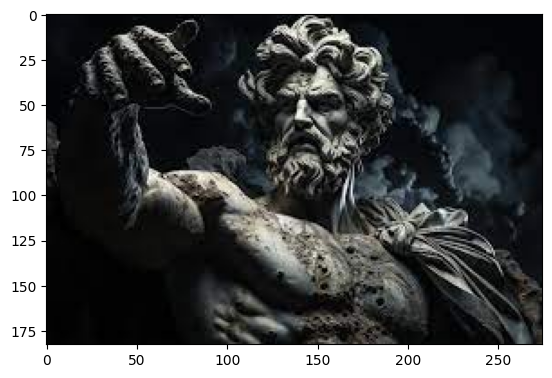

In [3]:
image = Image.open(os.path.join('/kaggle/input/estoico/estoicos.jpg'))
print("Tamaño de la imágen: ", image.size)
plt.imshow(image)
plt.show()

In [4]:
# Ver los valores de los píxeles
# Tiene formato (H x W x C) (altura, ancho, canales)
numpy_image = np.asarray(image)
print(numpy_image.shape)
print('valor máximo de los píxeles: ', numpy_image.max())
print('valor mínimo de los píxeles: ', numpy_image.min())

(183, 275, 3)
valor máximo de los píxeles:  255
valor mínimo de los píxeles:  0


In [5]:
# Valores de píxeles en la imagen
numpy_image

array([[[ 7,  8, 13],
        [ 7,  8, 13],
        [ 8,  9, 14],
        ...,
        [ 3,  4,  8],
        [ 3,  4,  8],
        [ 3,  4,  8]],

       [[ 7,  8, 13],
        [ 7,  8, 13],
        [ 8,  9, 14],
        ...,
        [ 3,  4,  8],
        [ 3,  4,  8],
        [ 3,  4,  8]],

       [[ 7,  8, 13],
        [ 7,  8, 13],
        [ 8,  9, 14],
        ...,
        [ 3,  4,  8],
        [ 3,  4,  8],
        [ 3,  4,  8]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [33, 29, 26],
        [40, 37, 30],
        [48, 45, 38]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [29, 25, 22],
        [36, 33, 26],
        [44, 41, 34]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [42, 38, 35],
        [49, 46, 39],
        [57, 54, 47]]], dtype=uint8)

In [6]:
print("Número total de píxeles en la imagen :", numpy_image.shape[0] * numpy_image.shape[1] * numpy_image.shape[2])

Número total de píxeles en la imagen : 150975


### Aumento de imágenes con transformaciones

Para hacer tranformaciones de imágenes en PyTorch, usamos `torchvision.transforms.v2` o `torchvision.transforms`. 

`v2` es la nueva versión. Aunque está todavía en beta, PyTorch recomienda que usamos `v2`.

**Formato de entrada:** se puede usar imágenes tipo PIL (pillow) o tensores 

- Imágenes en formato tensor tienen la forma **(C, H, W)** dónde **C** es el número de canales y **H** y **W** son la altura y ancho respectivamente. 

- Para entradas en batches, la forma será **(N, C, H, W)**, dónde **N** es le número de imágenes en el batch.

Hay muchas transformaciones que se puede aplicar: https://pytorch.org/vision/stable/transforms.html

In [7]:
# Mostrar la imagen original junto con la imagen transformada
def plot_images(image, image_trans, title, title_trans):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,10))
    ax[0].imshow(image)
    ax[0].set_title(title)
    ax[1].imshow(image_trans)
    ax[1].set_title(title_trans)
    plt.show()

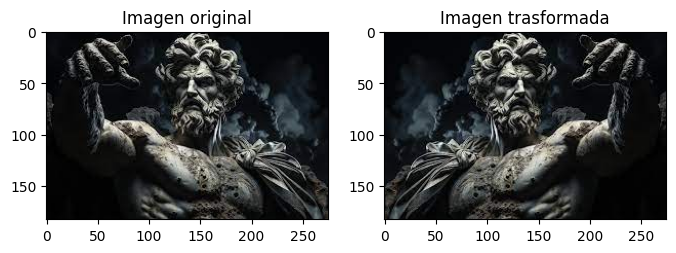

In [8]:
transforms = v2.Compose([
   v2.ToImage(),  # Convertir la imagen a un tensor ya que nuestra imágen es en formato PIL
   v2.RandomHorizontalFlip(p=1), # p=1 probabilidad de voltear es 1. Se puede cambiar a 0.5 para voltear solamente la mitad de las imágenes
   v2.ToPILImage(), # Convertirla de nueva a PIL para poder mostrarla
])

tras_image = transforms(image)

plot_images(image, tras_image, 'Imagen original', 'Imagen trasformada')

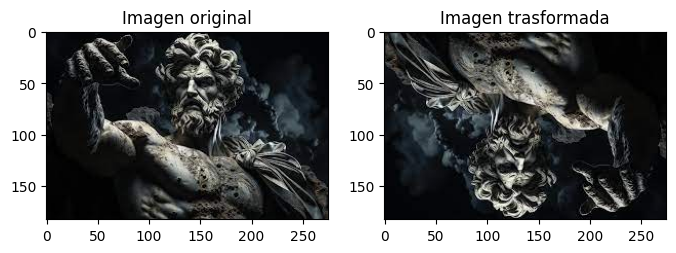

In [9]:
transforms = v2.Compose([
   v2.ToImage(),  # Convertir la imagen a un tensor ya que nuestra imágen es en formato PIL
   v2.RandomVerticalFlip(p=1), # p=1 probabilidad de voltear es 1. Se puede cambiar a 0.5 para voltear solamente la mitad de las imágenes
   v2.RandomHorizontalFlip(p=1), # p=1 probabilidad de voltear es 1. Se puede cambiar a 0.5 para voltear solamente la mitad de las imágenes
   v2.ToPILImage(), # Convertirla de nueva a PIL para poder mostrarla
])

tras_image = transforms(image)

plot_images(image, tras_image, 'Imagen original', 'Imagen trasformada')

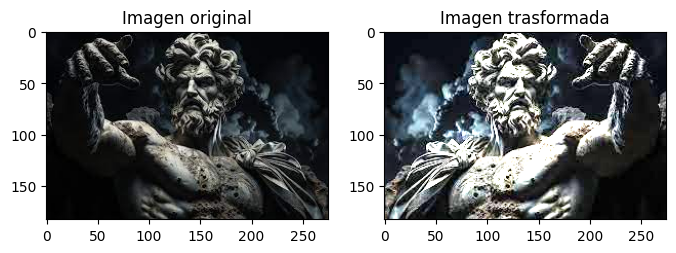

In [10]:
transforms = v2.Compose([
   v2.ToImage(),  # Convertir la imagen a un tensor ya que nuestra imágen es en formato PIL
   v2.RandomHorizontalFlip(p=1), # p=1 probabilidad de voltear es 1. Se puede cambiar a 0.5 para voltear solamente la mitad de las imágenes
   v2.ColorJitter(brightness=3), # parametro brightness determina qué tan brillante es la imagen 
   v2.ToPILImage(), # Convertirla de nueva a PIL para poder mostrarla
])

tras_image = transforms(image)

plot_images(image, tras_image, 'Imagen original', 'Imagen trasformada')

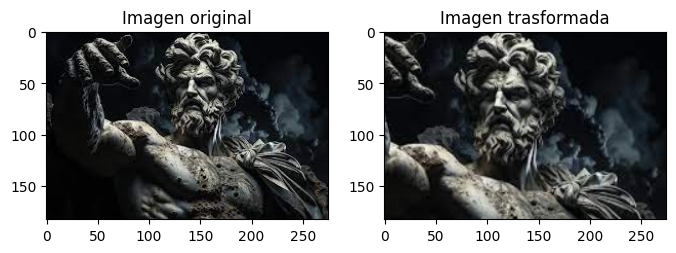

In [11]:
transforms = v2.Compose([
   v2.ToImage(),  # Convertir la imagen a un tensor ya que nuestra imágen es en formato PIL
   v2.RandomCrop(size=(140,220)), # size especifica el tamaño nuevo de la imagen 
   v2.Resize(size=(183, 275), antialias=True), # Cambiar el tamaño a 183 x 200
   v2.ToPILImage(), # Convertirla de nueva a PIL para poder mostrarla
])

tras_image = transforms(image)

plot_images(image, tras_image, 'Imagen original', 'Imagen trasformada')

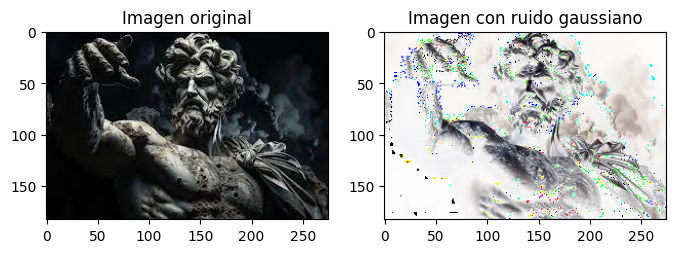

In [12]:
def add_gaussian_noise(image, stddev=0.0001):
    noise = torch.randn(image.size()) * stddev
    return image + noise

transforms = v2.Compose([
    v2.ToImage(),
    add_gaussian_noise,  
    v2.ToPILImage(),
])

transformed_image = transforms(image)

plot_images(image, transformed_image, 'Imagen original', 'Imagen con ruido gaussiano')

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


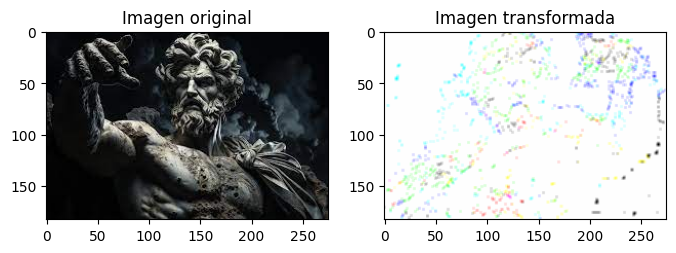

In [13]:
transforms = v2.Compose([
    v2.ToImage(),
    add_gaussian_noise,  # Noise added to PIL format image
    v2.RandomHorizontalFlip(),
    v2.ColorJitter(brightness=0.5, contrast=20),
    v2.GaussianBlur(kernel_size=(3, 3)),
    v2.ToTensor(),  # Convert to tensor for remaining transformations
    v2.ToPILImage(),  # Convert back to PIL for plotting
])

transformed_image = transforms(image)
plot_images(image, transformed_image, 'Imagen original', 'Imagen transformada')

In [14]:
transforms_train = v2.Compose([
        v2.ToImage(),  # Convertir la imagen a un tensor ya que nuestra imagen es en formato PIL
        v2.RandomHorizontalFlip(0.5), # Voltear la imagen horizontalmente con probabilidad 0.5
        v2.RandomVerticalFlip(0.3), # Voltear la imagen verticalmente con probabilidad 0.3
        v2.ToDtype(torch.float32, scale=True), # Cambiar el formato de los números a float y escalarlo entre 0 y 1
        v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # Normalizar los píxeles entre -1 y 1
    ])
transforms_evaluate = v2.Compose([
        v2.ToImage(),  # Convertir la imagen a un tensor ya que nuestra imagen es en formato PIL
        v2.ToDtype(torch.float32, scale=True),  # Cambiar el formato de los números a float y escalarlo entre 0 y 1
        v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # Normalizar los píxeles entre -1 y 1
    ])

batch_size = 64

# Descargar el conjunto de datos CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms_train)

# Dividir el conjunto de datos de entrenamiento en subconjuntos de entrenamiento y validación
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_dataset, val_dataset = random_split(trainset, [train_size, val_size])

# Crear cargadores de datos para entrenamiento, validación y prueba
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms_evaluate)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 82014695.61it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


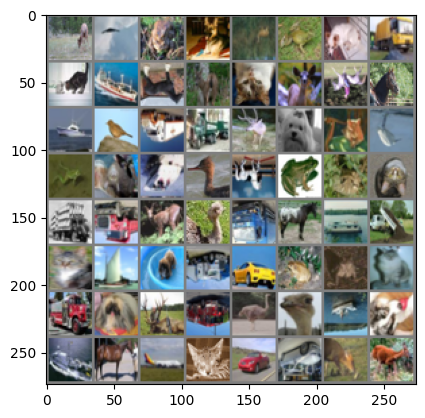

deer  plane frog  dog   deer  frog  dog   truck cat   ship  horse deer  cat   deer  horse horse ship  bird  truck truck deer  dog   cat   bird  frog  cat   ship  bird  horse frog  frog  cat   truck truck deer  bird  truck horse ship  truck cat   ship  dog   truck car   frog  frog  cat   truck dog   deer  truck bird  bird  ship  dog   ship  horse plane cat   car   car   deer  deer 


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [16]:
# Poner la imagen en el formato que necesitamos
def img_display(img):
    img = img / 2 + 0.5     # deshacer normalización
    npimg = img.numpy()     # cambiar al tipo numpy array (de tipo tensor)
    npimg = np.transpose(npimg, (1, 2, 0)) # poner las dimensiones en el orden que necesita matplotlib (H x W x C) en vez de (C x H x W)
    return npimg

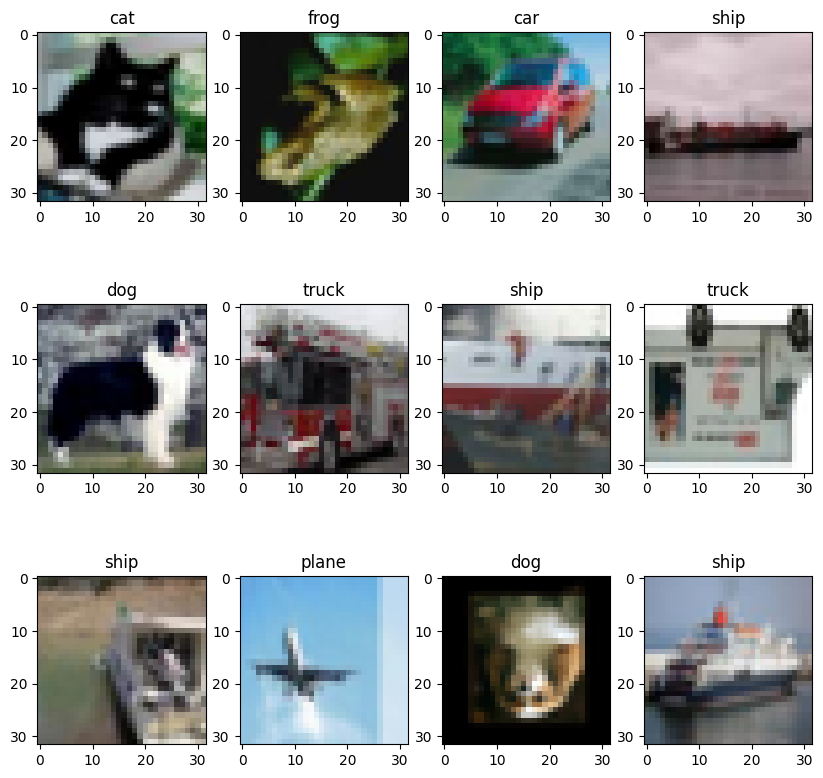

In [17]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

fig, axis = plt.subplots(3, 4, figsize=(10, 10))
for i, ax in enumerate(axis.flat):
    with torch.no_grad():
        image, label = images[i], labels[i]
        ax.imshow(img_display(image)) # mostrar imagen
        ax.set(title = classes[label.item()]) # añadir etiqueta

#### Tamaño de la salida
Salida = [(H (altura) - kernel_size + 2 * padding)/stride + 1] x [(W (ancho) - kernel_size + 2 * padding)/stride + 1] x out_channels (número de filtros)

In [18]:
simple_model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(kernel_size=2, stride=2),
)
# tamaño de imagenes
for images, labels in trainloader:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([64, 3, 32, 32])
out.shape: torch.Size([64, 12, 16, 16])


In [25]:
[(183-3+2*1)/1+1], [(275-3+2*1)/1+1], 12 

([183.0], [275.0], 12)

In [40]:
[(183-2+2*0)/2+1], [(275-2+2*0)/2+1], 12 

([91.5], [137.5], 12)

In [83]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Imprimir el tamaño de las imágenes
print("Tamaño de las imágenes:", images.size())


Tamaño de las imágenes: torch.Size([64, 3, 32, 32])


In [84]:
# Crear nuestra red convolucional
class ImagePredictor(nn.Module):
    
    # Defining the Constructor
    def __init__(self, num_classes):
        super(ImagePredictor, self).__init__()
        # En la función de init definimos todas las capas que vamos a usar en nuestro modelo

        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1),
            # Salida: 183x275x12
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Salida: 91x137x12
            nn.ReLU(),
            nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1),
            # Salida: 91x137x24
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Salida: 45x68x24
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(in_features= 8 * 8 * 24, out_features=num_classes)
                )

    def forward(self, x):
        # In esta función pasamos los datos a traves de las capas que definimos en la función init 
        x = self.network(x)
        # Devolver las probabilidades para cada clase con la función log_softmax
        return torch.log_softmax(x, dim=1)

In [85]:
# Especificamos que queremos usar una GPU si está disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [86]:
# Initializar el modelo y mandarlo a la GPU 
model = ImagePredictor(num_classes=len(classes)).to(device)
print(model)

ImagePredictor(
  (network): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1536, out_features=10, bias=True)
  )
)


In [87]:
for i_batch, (x_train, y_train) in enumerate(trainloader):
    print("número de batch :", i_batch)
    print("x_train en i_batch : ", x_train.size())
    print("y_train en i_batch :", y_train.size())
    break

# Vemos que son los outputs del modelo - probabilidades en este caso
outputs = model(x_train.to(device))
print("-----------------------------")
print("Probabilidades logarítmicas")
print("-----------------------------")
print(outputs)
print(outputs.shape)
print("-----------------------------")
print("Clase predicha")
print("-----------------------------")
_,pred = torch.max(outputs, dim=1)
print(pred)
print(pred.shape)


número de batch : 0
x_train en i_batch :  torch.Size([64, 3, 32, 32])
y_train en i_batch : torch.Size([64])
-----------------------------
Probabilidades logarítmicas
-----------------------------
tensor([[-2.2186, -2.4027, -2.3029, -2.2554, -2.2584, -2.3007, -2.2812, -2.3457,
         -2.3226, -2.3509],
        [-2.2508, -2.3432, -2.2646, -2.2641, -2.2386, -2.2826, -2.2829, -2.4485,
         -2.3415, -2.3263],
        [-2.1982, -2.4561, -2.3474, -2.2548, -2.3504, -2.2708, -2.1787, -2.3307,
         -2.3174, -2.3516],
        [-2.1934, -2.4028, -2.3193, -2.1835, -2.2892, -2.2903, -2.2439, -2.3537,
         -2.3253, -2.4580],
        [-2.1737, -2.4211, -2.3399, -2.3146, -2.3057, -2.2444, -2.2311, -2.3555,
         -2.2772, -2.3884],
        [-2.2852, -2.3897, -2.3229, -2.2451, -2.2990, -2.2870, -2.2612, -2.3367,
         -2.2901, -2.3165],
        [-2.2365, -2.3863, -2.2628, -2.2602, -2.3349, -2.2862, -2.2024, -2.3424,
         -2.3781, -2.3542],
        [-2.2034, -2.4521, -2.2666, -2.28

In [99]:
train_loader = trainloader

In [105]:
val_loader = valloader

In [122]:
test_loader = testloader

In [113]:
# Especificar tasa de aprendizaje
learning_rate = 0.01

# Usamos el optimizador Adam 
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Especificar la función de coste 
loss_criteria = nn.CrossEntropyLoss()

In [114]:
# Función para el entrenamiento de una época
def train(model, device, train_loader, optimizer, loss_criteria):
    # Pon modelo en modo para entrenar
    model.train()

    # Especificar variables para las metricas
    epoch_loss = 0
    elements = 0
    correct = 0
    
    # Procesar las imágenes en batches (lotes)
    for i_batch, (image, label) in enumerate(train_loader):
       
        # Mover los datos al GPU (si estamos usandolo)
        image, label = image.to(device), label.to(device)
        
        # Pon a cero los gradientes para cada batch 
        # No mezclar información de los gradientes del batch anterior con este batch
        optimizer.zero_grad()
        
        # Calcular la salida del modelo
        outputs = model(image)
        
        # Calcular las perdidas y el coste # Get the loss
        batch_loss = loss_criteria(outputs, label)

        # Calcular los gradientes 
        batch_loss.backward()

        # Ajustar los parametros (pesos y sesgos)
        optimizer.step()

        # Guardar las metricas
        epoch_loss += batch_loss.item()

        # Calcular cuantos han sido predicho correctamente
        _, predicted = torch.max(outputs.data, 1)
        correct += torch.sum(label==predicted).item()
        elements += len(label)


    # Calcular la metrica para la época entera
    loss_train = epoch_loss / i_batch
    acc_train = correct / elements

    return loss_train, acc_train

In [115]:
# Función para la validación de una época
def evaluation(model, val_loader, loss_criteria):
    # Pon modelo en modo para evaluar
    model.eval()

    # Especificar variables para las metricas
    epoch_loss = 0
    elements = 0
    correct = 0

    # No queremos calcular los gradientes
    with torch.no_grad():
         
         # Procesar las imágenes en batches (lotes)
         for i_batch, (image, label) in enumerate(val_loader):
            
            # Mover los datos al GPU (si estamos usandolo)
            image, label = image.to(device), label.to(device)

            # Calcular la salida del modelo
            outputs = model(image)

            # Calcular las perdidas y el coste
            batch_loss = loss_criteria(outputs, label)

            # Guardar las metricas
            epoch_loss += batch_loss.item()
            
            # Seleccionar la clase con la probabilidad más alta
            _, predicted = torch.max(outputs.data, 1)
            
            # Calcular cuantos han sido predicho correctamente
            correct += torch.sum(label==predicted).item()
            elements += len(label)
    
    # Calcular la metrica para la época entera
    loss_val = epoch_loss / i_batch
    acc_val = correct / elements

    return loss_val, acc_val

In [116]:
def training_evaluation_loop(epochs, model, train_loader, val_loader, optimizer, loss_criteria):
    # Iniciar temporizador para realize un seguimiento del tiempo de entrenamiento
    start = time.time()
    
    # Crear listas para las metricas
    loss_values_train = []
    acc_values_train = []
    loss_values_val = []
    acc_values_val = []

    for epoch in range(epochs):
        
        # Ejecutar función de entrenamiento y guardar las metricas
        loss_train, acc_train = train(model, device, train_loader, optimizer, loss_criteria)
        loss_values_train.append(loss_train)
        acc_values_train.append(acc_train)

        # Ejecutar función de validación y guardar las metricas
        loss_val, acc_val = evaluation(model, val_loader, loss_criteria)
        loss_values_val.append(loss_val)
        acc_values_val.append(acc_val)

        print(f'Epoch: {epoch:4.0f} | Train Loss: {loss_train:.5f}, Train Accuracy: {acc_train:.5f} | Validation Loss: {loss_val:.5f}, Val Accuracy: {acc_val:.5f}')
        
    end = time.time()
    total_time = end - start

    print(f'Total training time: {total_time}')

    return loss_values_train, acc_values_train, loss_values_val, acc_values_val

In [117]:
epochs = 10
loss_values_train, acc_values_train, loss_values_val, acc_values_val = training_evaluation_loop(epochs, model, train_loader, val_loader, optimizer, loss_criteria)

Epoch:    0 | Train Loss: 1.72617, Train Accuracy: 0.36873 | Validation Loss: 1.65706, Val Accuracy: 0.39240
Epoch:    1 | Train Loss: 1.56819, Train Accuracy: 0.43110 | Validation Loss: 1.56133, Val Accuracy: 0.43860
Epoch:    2 | Train Loss: 1.51301, Train Accuracy: 0.45255 | Validation Loss: 1.48555, Val Accuracy: 0.46730
Epoch:    3 | Train Loss: 1.49721, Train Accuracy: 0.45830 | Validation Loss: 1.48349, Val Accuracy: 0.45430
Epoch:    4 | Train Loss: 1.48331, Train Accuracy: 0.46418 | Validation Loss: 1.49854, Val Accuracy: 0.45920
Epoch:    5 | Train Loss: 1.47492, Train Accuracy: 0.46953 | Validation Loss: 1.48570, Val Accuracy: 0.46200
Epoch:    6 | Train Loss: 1.46367, Train Accuracy: 0.47360 | Validation Loss: 1.51931, Val Accuracy: 0.46350
Epoch:    7 | Train Loss: 1.45712, Train Accuracy: 0.47428 | Validation Loss: 1.43234, Val Accuracy: 0.48890
Epoch:    8 | Train Loss: 1.44570, Train Accuracy: 0.48373 | Validation Loss: 1.44967, Val Accuracy: 0.47920
Epoch:    9 | Train

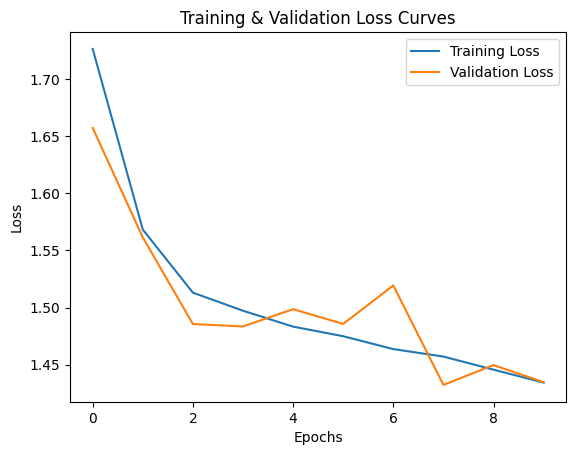

In [118]:
plt.plot(list(range(epochs)), loss_values_train, label='Training Loss')
plt.plot(list(range(epochs)), loss_values_val, label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

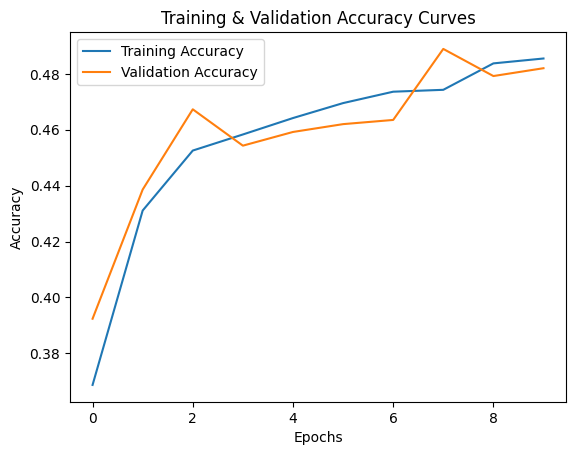

In [119]:
plt.plot(list(range(epochs)), acc_values_train, label='Training Accuracy')
plt.plot(list(range(epochs)), acc_values_val, label='Validation Accuracy')
plt.title('Training & Validation Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [155]:
def predictions(model, test_loader):

    # Crear listas para los valores predichos y reales
    predictions = []
    true_labels = []

    correct = 0
    # Pon modelo en modo para evaluar
    model.eval()
     # No queremos calcular los gradientes
    with torch.no_grad():
        for image, label in test_loader:

            # Mover los datos al GPU (si estamos usandolo)
            image, label = image.to(device), label.to(device)

            # Calcular la salida del modelo
            outputs = model(image)

            # Seleccionar la clase con la probabilidad más alta
            _, predicted = torch.max(outputs.data, 1)

            # Calcular cuantos han sido predicho correctamente
            correct += torch.sum(label==predicted).item()

            # Mover los datos al CPU y cambiar el tipo a numpy en vez de tensor
            predictions.append(predicted.detach().cpu().numpy())
            true_labels.append(label.detach().cpu().numpy())
    
    # Poner los datos en el formato que los necesitamos        
    predictions = np.hstack(predictions)
    true_labels = np.hstack(true_labels)

    print(f'Test set has accuracy of: {correct/len(true_labels)*100}%') # test_loader

    return predictions, true_labels

In [123]:
# Ejecutar la función para generar las predicciones para los datos de prueba
predictions, true_labels = predictions(model, test_loader)

Test set has accuracy of: 50.67%


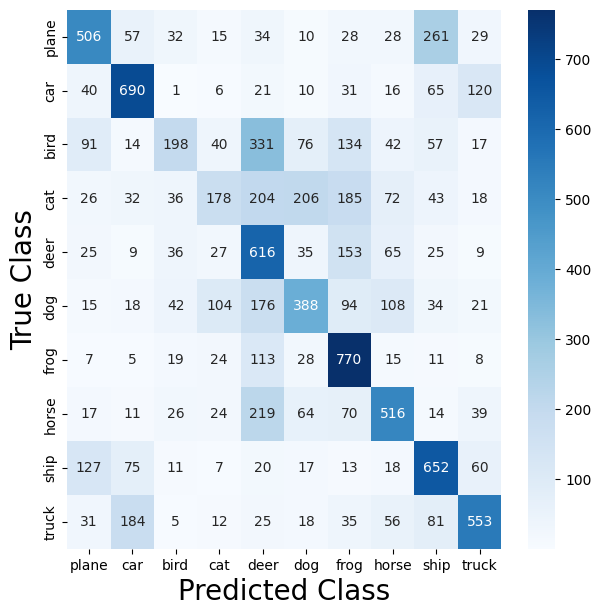

In [130]:
# Matriz de confusión
cm = confusion_matrix(true_labels, predictions)
tick_marks = np.arange(len(classes))

df_cm = pd.DataFrame(cm, index = classes, columns = classes)
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize = 20)
plt.ylabel("True Class", fontsize = 20)
plt.show()

## Modelo 2

In [146]:
# Crear nuestra red convolucional
class ImagePredictor(nn.Module):
    
    # Defining the Constructor
    def __init__(self, num_classes):
        super(ImagePredictor, self).__init__()
        # En la función de init definimos todas las capas que vamos a usar en nuestro modelo

        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1),
            # Salida: 32x32x12
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Salida: 16x16x12
            nn.ReLU(),
            nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1),
            # Salida: 16x16x24
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Salida: 8x8x24
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(in_features=8 * 8 * 24, out_features=num_classes)
        )

    def forward(self, x):
        # En esta función pasamos los datos a través de las capas que definimos en la función init 
        x = self.network(x)
        # Devolver las probabilidades para cada clase con la función log_softmax
        return torch.log_softmax(x, dim=1)
    
# Initializar el modelo y mandarlo a la GPU 
model = ImagePredictor(num_classes=len(classes)).to(device)
print(model)

ImagePredictor(
  (network): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1536, out_features=10, bias=True)
  )
)


In [147]:
for i_batch, (x_train, y_train) in enumerate(trainloader):
    print("número de batch :", i_batch)
    print("x_train en i_batch : ", x_train.size())
    print("y_train en i_batch :", y_train.size())
    break

# Vemos que son los outputs del modelo - probabilidades en este caso
outputs = model(x_train.to(device))
print("-----------------------------")
print("Probabilidades logarítmicas")
print("-----------------------------")
print(outputs)
print(outputs.shape)
print("-----------------------------")
print("Clase predicha")
print("-----------------------------")
_,pred = torch.max(outputs, dim=1)
print(pred)
print(pred.shape)


número de batch : 0
x_train en i_batch :  torch.Size([64, 3, 32, 32])
y_train en i_batch : torch.Size([64])
-----------------------------
Probabilidades logarítmicas
-----------------------------
tensor([[-2.4006, -2.4842, -2.1598, -2.1690, -2.2799, -2.4132, -2.3904, -2.2445,
         -2.3578, -2.1868],
        [-2.4577, -2.4101, -2.1444, -2.1999, -2.3254, -2.3679, -2.4068, -2.2144,
         -2.3638, -2.1911],
        [-2.3891, -2.4010, -2.1552, -2.1719, -2.2758, -2.3948, -2.4082, -2.2350,
         -2.3672, -2.2711],
        [-2.3833, -2.3807, -2.1836, -2.1713, -2.3133, -2.3397, -2.4804, -2.2473,
         -2.4059, -2.1739],
        [-2.3977, -2.3820, -2.2043, -2.2073, -2.3424, -2.3488, -2.4281, -2.2075,
         -2.3649, -2.1834],
        [-2.3793, -2.4238, -2.1770, -2.2270, -2.3103, -2.4337, -2.4090, -2.1751,
         -2.3705, -2.1743],
        [-2.3654, -2.3012, -2.1371, -2.1398, -2.3317, -2.4261, -2.4791, -2.2735,
         -2.3919, -2.2394],
        [-2.3668, -2.3394, -2.2324, -2.25

In [148]:
# Especificar tasa de aprendizaje
learning_rate = 0.001

# Usamos el optimizador Adam 
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Especificar la función de coste 
loss_criteria = nn.CrossEntropyLoss()

epochs = 20
loss_values_train, acc_values_train, loss_values_val, acc_values_val = training_evaluation_loop(epochs, model, train_loader, val_loader, optimizer, loss_criteria)

Epoch:    0 | Train Loss: 1.69502, Train Accuracy: 0.39887 | Validation Loss: 1.49351, Val Accuracy: 0.46780
Epoch:    1 | Train Loss: 1.41755, Train Accuracy: 0.49707 | Validation Loss: 1.36820, Val Accuracy: 0.51090
Epoch:    2 | Train Loss: 1.31265, Train Accuracy: 0.53853 | Validation Loss: 1.27487, Val Accuracy: 0.54690
Epoch:    3 | Train Loss: 1.23717, Train Accuracy: 0.56622 | Validation Loss: 1.22024, Val Accuracy: 0.56700
Epoch:    4 | Train Loss: 1.18691, Train Accuracy: 0.58413 | Validation Loss: 1.21887, Val Accuracy: 0.56640
Epoch:    5 | Train Loss: 1.15067, Train Accuracy: 0.59765 | Validation Loss: 1.18054, Val Accuracy: 0.58250
Epoch:    6 | Train Loss: 1.12732, Train Accuracy: 0.60547 | Validation Loss: 1.14285, Val Accuracy: 0.59400
Epoch:    7 | Train Loss: 1.10807, Train Accuracy: 0.61262 | Validation Loss: 1.13334, Val Accuracy: 0.60110
Epoch:    8 | Train Loss: 1.08814, Train Accuracy: 0.61895 | Validation Loss: 1.12498, Val Accuracy: 0.60030
Epoch:    9 | Train

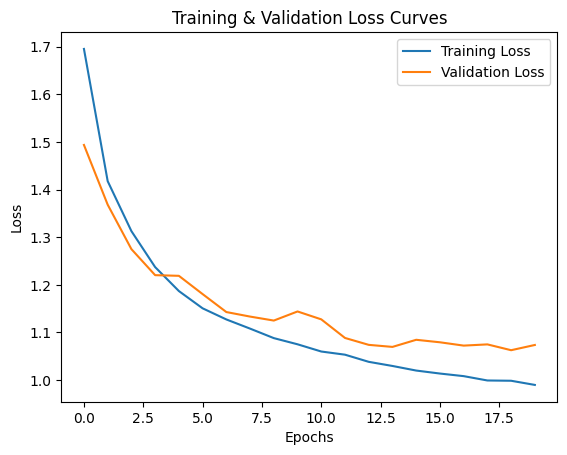

In [149]:
plt.plot(list(range(epochs)), loss_values_train, label='Training Loss')
plt.plot(list(range(epochs)), loss_values_val, label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

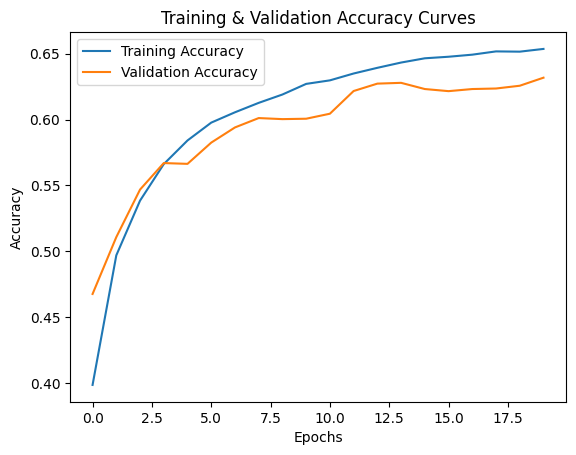

In [150]:
plt.plot(list(range(epochs)), acc_values_train, label='Training Accuracy')
plt.plot(list(range(epochs)), acc_values_val, label='Validation Accuracy')
plt.title('Training & Validation Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [156]:
# Ejecutar la función para generar las predicciones para los datos de prueba
predictions, true_labels = predictions(model, test_loader)

Test set has accuracy of: 66.32000000000001%


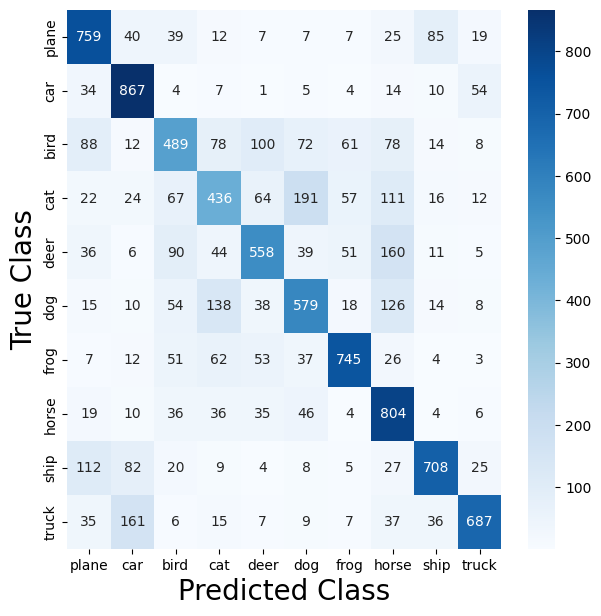

In [158]:
# Matriz de confusión
cm = confusion_matrix(true_labels, predictions)
tick_marks = np.arange(len(classes))

df_cm = pd.DataFrame(cm, index = classes, columns = classes)
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize = 20)
plt.ylabel("True Class", fontsize = 20)
plt.show()

¿Qué significa cada dimensión en la salida?

La dimension de salida son tensores que indican el tamaño del batch o lote, la cnatidad de canales (3 para colores) seguido del alto y ancho de la imagen, es decir el numero de pixeles.

¿Cómo afecta una capa de pooling al tamaño de la salida?

La capa de pooling se utiliza para disminuir el tamaño de las iamgenes, intentado capturar o mantener las caracteristica mas imporantes, seleccionando el valor maximo de una matriz dentro del la cada salida, o el valor medio.

¿Cómo afectan los parámetros de padding y stride al tamaño de la salida?

El padign y stride son parametros que tambien modifican el tamaño de las salidas, ya que con stride puedo hacer saltos en las matrices de kernel, para que no se mueva pixel a pixel sino cada dos o mas pixeles, por otro lado el padding me genere datos adicionales, pero captando informacion importante de los bordes de cada imagen. 

¿Cómo afecta el tamaño del filtro/núcleo al tamaño de la salida?

el tamaño del filtro aumenta el tamaño de la salida, ya que un filtro muy gande cubre un area mas grande, y un filtro mas pequeño cubre un area mas pequeña, y tambien modifica las caracteristicas o informacion imporante extraida de las imagenes. 
